In [1]:
import numpy as np

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import sys
import pickle
import os
import pdb
 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns

# %pylab inline
# inline doesn't give interactive plots
%matplotlib inline 
# %matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'Blues'

%load_ext autoreload
%autoreload 2

sns.set()

sys.path.append("../workstatation")

from utils.trajectory_utils import truncate_expert_data
from utils import data_utils
from utils.control_loop_data import ControlLoopData

[(0, 4000), (4000, 8002), (8002, 12002), (12002, 14162), (14162, 18164), (18164, 22161), (22161, 23197), (23197, 43585), (43585, 44583), (44583, 48583), (48583, 52582), (52582, 53491), (53491, 73898), (73898, 74889), (74889, 78881), (78881, 82858), (82858, 83840), (83840, 104083), (104083, 105083)]


dict

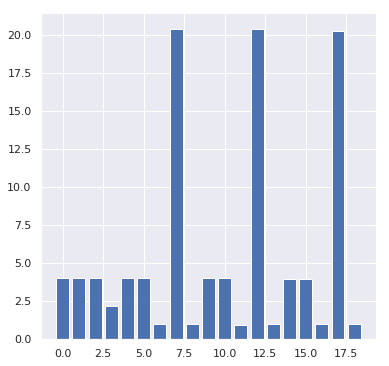

In [2]:
control_loop_data_path = '/home/mohit/try_4/control_loop_data.txt'
csv_data = data_utils.read_data_as_csv(control_loop_data_path)

control_loop_data = ControlLoopData(csv_data) 
print(control_loop_data.skill_time_as_tuple_list)

skill_times = control_loop_data.get_duration_for_each_skill()
skill_times_in_seconds = [t/1000.0 for t in skill_times] 

matplotlib.pyplot.bar(range(len(skill_times_in_seconds)), skill_times_in_seconds)

type(csv_data)
